In [31]:
#Dependencies
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import numpy as np

In [32]:
#Read data files
happy17=pd.DataFrame(pd.read_csv('CSVs/Happiness_2017.csv'))
sanitation=pd.DataFrame(pd.read_csv('CSVs/basic_sanitation.csv'))
happy17.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [33]:
#Clean happiness dataframe
happy17=happy17[['Country', 'Happiness.Score']]
happy17=happy17.rename(columns={'Happiness.Score':'2017 Happiness Score'})
happy17.head()

,Country,2017 Happiness Score
0,Norway,7.537
1,Denmark,7.522
2,Iceland,7.504
3,Switzerland,7.494
4,Finland,7.469


In [34]:
sanitation.head()

,Unnamed: 0,2017
0,NaN,Population using at least basic sanitation ser...
1,Country,Total
2,Afghanistan,43
3,Albania,98
4,Algeria,88


In [35]:
#Clean sanitation dataframe
sanitation=sanitation.rename(columns={'Unnamed: 0':'Country',
                                      '2017':'Population using at least basic sanitation services (%)'})
sanitation=sanitation.drop([0,1])
sanitation.head()

,Country,Population using at least basic sanitation services (%)
2,Afghanistan,43
3,Albania,98
4,Algeria,88
5,Andorra,100
6,Angola,50


In [50]:
happy_sanitation = pd.merge(happy17, sanitation, on='Country', how='outer')
happy_sanitation['Country'] = happy_sanitation['Country'].rename(
    {'United States of America': 'United States', 'United Kingdom of Great Britain and Northern Ireland': 'United Kingdom',
    'Czechia':'Czech Republic','Republic of Moldova':'Moldova','Russian Federation':'Russia','Congo':'Congo (Brazzaville)',
    'Democratic Republic of the Congo':'Congo (Kinshasa)','Republic of Korea':'South Korea','Republic of Moldova':'Moldova',
    'Bolivia (Plurinational State of)':'Bolivia','Venezuela (Bolivarian Republic of)':'Venezuela','Republic of North Macedonia':
    'Macedonia','Viet Nam':'Vietnam','Iran (Islamic Republic of)':'Iran',"Côte d'Ivoire":'Ivory Coast','Syrian Arab Republic':
    'Syria','United Republic of Tanzania':'Tanzania',})

happy_sanitation.to_csv('csvs/happy_sanitation.csv')

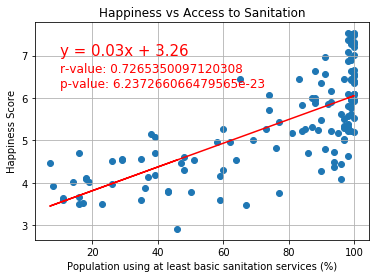

R-value: 0.7265350097120308, P-value: 6.237266066479565e-23


In [37]:
#Linear Regression!
y_values=happy_sanitation['2017 Happiness Score']
x_values=happy_sanitation['Population using at least basic sanitation services (%)'].astype(int)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.title('Happiness vs Access to Sanitation')
plt.xlabel('Population using at least basic sanitation services (%)')
plt.ylabel('Happiness Score')
r_value=(f"r-value: {rvalue}")
p_value=(f"p-value: {pvalue}")
plt.annotate(line_eq,(10,7),fontsize=15,color="red")
plt.annotate(r_value,(10,6.6),fontsize=12,color="red")
plt.annotate(p_value,(10,6.25),fontsize=12,color="red")
plt.grid()
plt.savefig('Images/sanitation.png')
plt.show()
print(f"R-value: {rvalue}, P-value: {pvalue}")

In [38]:
#Strong positive correlation!
len(happy_sanitation)

132

In [39]:
#Read in and merge dataset with ISO codes
iso=pd.read_csv('csvs/country_iso.csv')
iso=iso.drop(['Unnamed: 0'], axis=1)
iso=iso.rename(columns={'iso_a3':'Code'})
happy=pd.merge(iso, happy_sanitation, on='Country', how='inner')
happy.head()

,Country,Happiness score,Code,2017 Happiness Score,Population using at least basic sanitation services (%)
0,Finland,7.769,FIN,7.469,99
1,Denmark,7.600,DNK,7.522,100
2,Norway,7.554,NOR,7.537,98
3,Iceland,7.494,ISL,7.504,99
4,Netherlands,7.488,NLD,7.377,98


In [40]:
#import dataset with geographic info to plot chorograph
import geopandas 

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world = world.rename(columns={'iso_a3':'Code'}) 
world = pd.merge(world, happy, on='Code', how='inner')
world.head()

,pop_est,continent,name,Code,gdp_md_est,geometry,Country,Happiness score,2017 Happiness Score,Population using at least basic sanitation services (%)
0,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",Canada,7.278,7.316,99
1,18556698,Asia,Kazakhstan,KAZ,460700.0,"POLYGON ((87.35997 49.21498, 86.59878 48.54918...",Kazakhstan,5.809,5.819,98
2,29748859,Asia,Uzbekistan,UZB,202300.0,"POLYGON ((55.96819 41.30864, 55.92892 44.99586...",Uzbekistan,6.174,5.971,100
3,260580739,Asia,Indonesia,IDN,3028000.0,"MULTIPOLYGON (((141.00021 -2.60015, 141.01706 ...",Indonesia,5.192,5.262,73
4,17789267,South America,Chile,CHL,436100.0,"MULTIPOLYGON (((-68.63401 -52.63637, -68.63335...",Chile,6.444,6.652,100


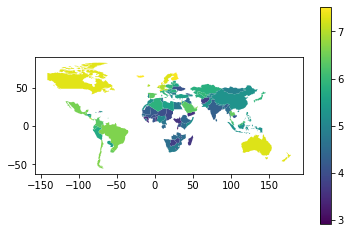

In [43]:
#Chorograph of Access to Basic Sanitation
fig, ax = plt.subplots(1,1)
world.plot(column='2017 Happiness Score', ax=ax, legend=True)
     